KONU: ÇATI ÜSTÜ GÜNEŞ ENERJİ SANTRALLERİNDE GEÇMİŞE DÖNÜK VERİLER İLE ENERJİ ÜRETİM TAHMİNİNİN GERÇEKLEŞTİRİLMESİ: DERİN ÖĞRENME VE XGBOOST İLE ZAMAN SERİSİ ANALİZİ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# VERİ YÜKLEME VE DÜZENLEME

In [ ]:
data = pd.read_excel('GES  Üretim Verileri.xlsx')

In [ ]:
data.head()

,Tarih ve Saat,Üretim Miktarı ( KWh ),Kurulu Güç
0,01/03/2021 00:00:00,0.0,999
1,01/03/2021 01:00:00,0.0,999
2,01/03/2021 02:00:00,0.0,999
3,01/03/2021 03:00:00,0.0,999
4,01/03/2021 04:00:00,0.0,999


In [ ]:
data.describe()

,Üretim Miktarı ( KWh ),Kurulu Güç
count,26908.000000,27024.0
mean,204.756243,999.0
std,309.369286,0.0
min,0.000000,999.0
25%,0.000000,999.0
50%,0.000000,999.0
75%,345.000000,999.0
max,983.250000,999.0


In [ ]:
data = data.dropna(subset = ['Üretim Miktarı ( KWh )'])
data.shape

(26908, 3)

In [ ]:
data['Üretim Miktarı ( KWh )'] = data['Üretim Miktarı ( KWh )'].astype(str)
data['Üretim Miktarı ( KWh )'] = data['Üretim Miktarı ( KWh )'].str.replace(',', '.') #virgülleri nokta yaparak numeric değişkene çevirme
data

,Tarih ve Saat,Üretim Miktarı ( KWh ),Kurulu Güç
0,01/03/2021 00:00:00,0.0,999
1,01/03/2021 01:00:00,0.0,999
2,01/03/2021 02:00:00,0.0,999
3,01/03/2021 03:00:00,0.0,999
4,01/03/2021 04:00:00,0.0,999
...,...,...,...
27019,30/03/2024 19:00:00,0.0,999
27020,30/03/2024 20:00:00,0.0,999
27021,30/03/2024 21:00:00,0.0,999
27022,30/03/2024 22:00:00,0.0,999


In [ ]:
data['Tarih ve Saat']= pd.to_datetime(data['Tarih ve Saat'], format='%d/%m/%Y %H:%M:%S')
data

,Tarih ve Saat,Üretim Miktarı ( KWh ),Kurulu Güç
0,2021-03-01 00:00:00,0.0,999
1,2021-03-01 01:00:00,0.0,999
2,2021-03-01 02:00:00,0.0,999
3,2021-03-01 03:00:00,0.0,999
4,2021-03-01 04:00:00,0.0,999
...,...,...,...
27019,2024-03-30 19:00:00,0.0,999
27020,2024-03-30 20:00:00,0.0,999
27021,2024-03-30 21:00:00,0.0,999
27022,2024-03-30 22:00:00,0.0,999


In [ ]:
data['year'] = data['Tarih ve Saat'].dt.year
data['month'] = data['Tarih ve Saat'].dt.month
data['day'] = data['Tarih ve Saat'].dt.day
data['hour'] = data['Tarih ve Saat'].dt.hour.apply(lambda x: '{:02d}:00'.format(x))
data.tail(25)

,Tarih ve Saat,Üretim Miktarı ( KWh ),Kurulu Güç,year,month,day,hour
26999,2024-03-29 23:00:00,0.00,999,2024,3,29,23:00
27000,2024-03-30 00:00:00,0.00,999,2024,3,30,00:00
27001,2024-03-30 01:00:00,0.00,999,2024,3,30,01:00
27002,2024-03-30 02:00:00,0.00,999,2024,3,30,02:00
27003,2024-03-30 03:00:00,0.00,999,2024,3,30,03:00
27004,2024-03-30 04:00:00,0.00,999,2024,3,30,04:00
27005,2024-03-30 05:00:00,0.00,999,2024,3,30,05:00
27006,2024-03-30 06:00:00,0.00,999,2024,3,30,06:00
27007,2024-03-30 07:00:00,51.75,999,2024,3,30,07:00
27008,2024-03-30 08:00:00,207.00,999,2024,3,30,08:00


In [ ]:
data['Üretim Miktarı ( KWh )'] = pd.to_numeric(data['Üretim Miktarı ( KWh )'], errors='coerce')

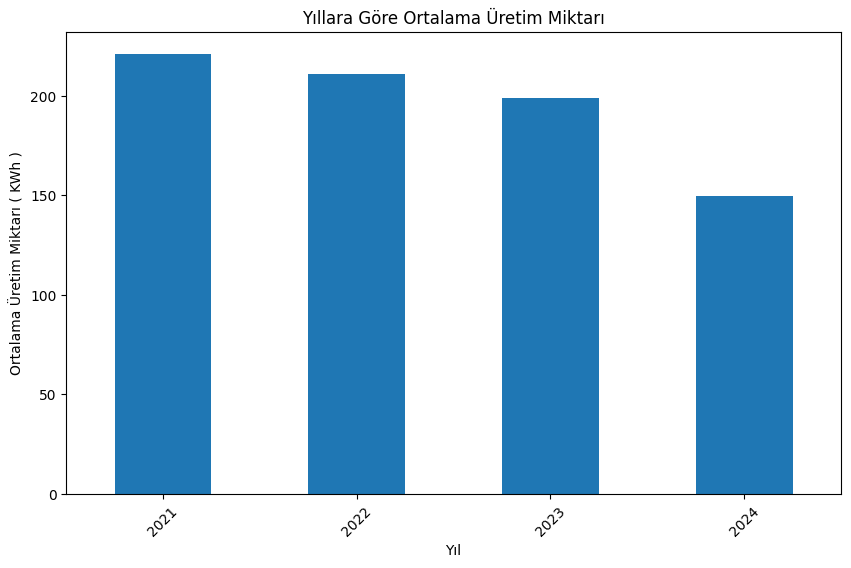

In [ ]:
üret_ort = data.groupby('year')['Üretim Miktarı ( KWh )'].mean()

#görselleştirme
üret_ort.plot(kind='bar', figsize=(10, 6), xlabel='Yıl', ylabel='Ortalama Üretim Miktarı ( KWh )', title='Yıllara Göre Ortalama Üretim Miktarı')
plt.xticks(rotation=45)  # x eksenindeki yıl etiketlerini 45 derece döndürme
plt.plot(üret_ort.index, üret_ort.values, color='red', marker='o', linestyle='-')
plt.show()

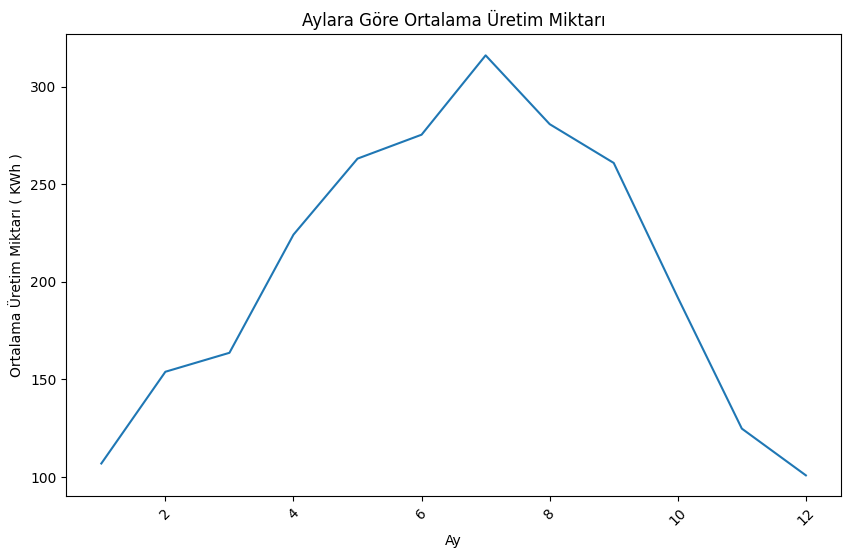

In [ ]:
üret_ort_month = data.groupby('month')['Üretim Miktarı ( KWh )'].mean()

üret_ort_month.plot(kind='line', figsize=(10, 6), xlabel='Ay', ylabel='Ortalama Üretim Miktarı ( KWh )', title='Aylara Göre Ortalama Üretim Miktarı')
plt.xticks(rotation=45)  # x eksenindeki ay etiketlerini 45 derece döndürme
plt.show()

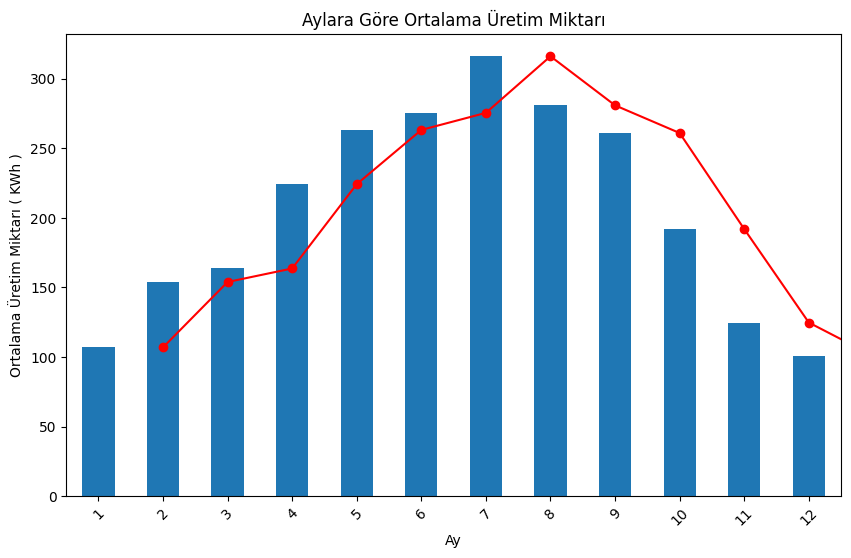

In [ ]:
üret_ort_month = data.groupby('month')['Üretim Miktarı ( KWh )'].mean()

üret_ort_month.plot(kind='bar', figsize=(10, 6), xlabel='Ay', ylabel='Ortalama Üretim Miktarı ( KWh )', title='Aylara Göre Ortalama Üretim Miktarı')
plt.xticks(rotation=45)  # x eksenindeki ay etiketlerini 45 derece döndürme
plt.plot(üret_ort_month.index, üret_ort_month.values, color='red', marker='o', linestyle='-')
plt.show()

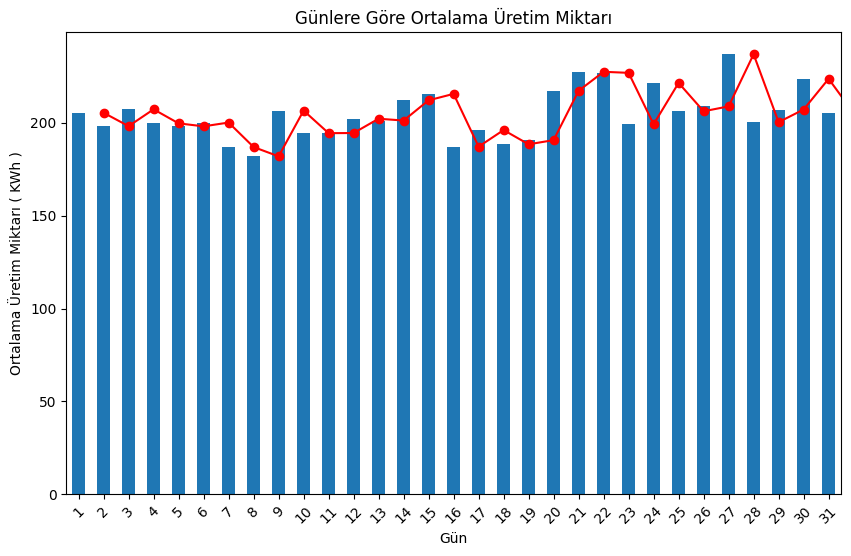

In [ ]:
üret_ort_day = data.groupby('day')['Üretim Miktarı ( KWh )'].mean()

üret_ort_day.plot(kind='bar', figsize=(10, 6), xlabel='Gün', ylabel='Ortalama Üretim Miktarı ( KWh )', title='Günlere Göre Ortalama Üretim Miktarı')
plt.xticks(rotation=45)  # x eksenindeki ay etiketlerini 45 derece döndürme
plt.plot(üret_ort_day.index, üret_ort_day.values, color='red', marker='o', linestyle='-')
plt.show()

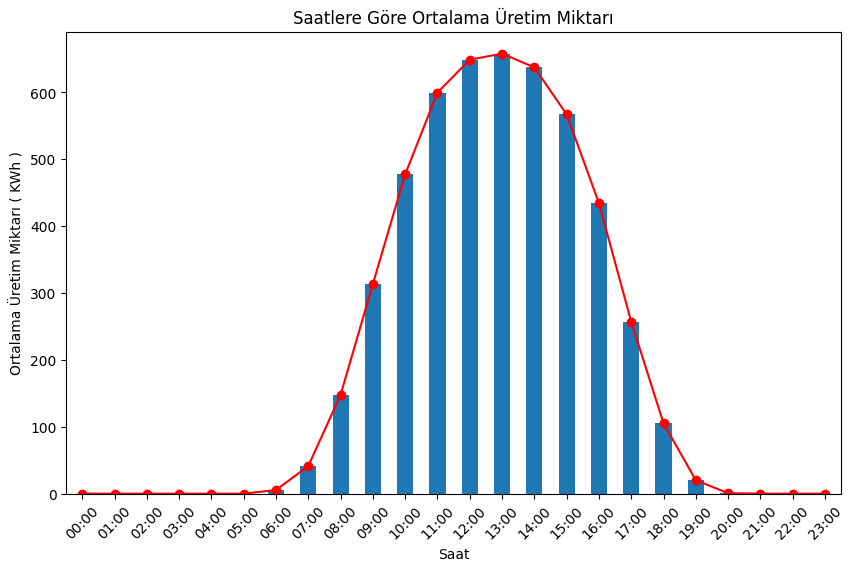

In [ ]:
üret_ort_hour = data.groupby('hour')['Üretim Miktarı ( KWh )'].mean()

üret_ort_hour.plot(kind='bar', figsize=(10, 6), xlabel='Saat', ylabel='Ortalama Üretim Miktarı ( KWh )', title='Saatlere Göre Ortalama Üretim Miktarı')
plt.xticks(rotation=45)  # x eksenindeki ay etiketlerini 45 derece döndürme
plt.plot(üret_ort_hour.index, üret_ort_hour.values, color='red', marker='o', linestyle='-')
plt.show()

In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix)

                        Tarih ve Saat  Üretim Miktarı ( KWh )  Kurulu Güç  \
Tarih ve Saat                1.000000               -0.052180         NaN   
Üretim Miktarı ( KWh )      -0.052180                1.000000         NaN   
Kurulu Güç                        NaN                     NaN         NaN   
year                         0.951385               -0.052615         NaN   
month                        0.000633                0.008244         NaN   
day                          0.022282                0.019430         NaN   

                            year     month       day  
Tarih ve Saat           0.951385  0.000633  0.022282  
Üretim Miktarı ( KWh ) -0.052615  0.008244  0.019430  
Kurulu Güç                   NaN       NaN       NaN  
year                    1.000000 -0.306315 -0.007116  
month                  -0.306315  1.000000  0.008343  
day                    -0.007116  0.008343  1.000000  


# ZAMAN SERİSİ

In [ ]:
data['Tarih ve Saat'] = pd.to_datetime(data['Tarih ve Saat'])
data.set_index('Tarih ve Saat', inplace=True)
data.head()

,Üretim Miktarı ( KWh ),Kurulu Güç,year,month,day
Tarih ve Saat,,,,,
2021-03-01 08:00:00,103.50,999,2021,3,1
2021-03-01 09:00:00,396.75,999,2021,3,1
2021-03-01 10:00:00,672.75,999,2021,3,1
2021-03-01 11:00:00,914.25,999,2021,3,1
2021-03-01 12:00:00,966.00,999,2021,3,1


In [ ]:
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

In [ ]:
# Eğitim verileri için öznitelikler ve hedef değişken
X_train = train.drop(columns=['Üretim Miktarı ( KWh )'])
y_train = train['Üretim Miktarı ( KWh )']

# Test verileri için öznitelikler ve hedef değişken
X_test = test.drop(columns=['Üretim Miktarı ( KWh )'])
y_test = test['Üretim Miktarı ( KWh )']


In [ ]:
# model = XGBRegressor()
# model.fit(train.drop('Üretim Miktarı ( KWh )', axis=1), train['Üretim Miktarı ( KWh )'])
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 300, 500],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'colsample_bynode': [0.8, 1.0]
}

# GridSearchCV kullanarak en iyi parametreleri bulma
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# En iyi parametreleri bulma
best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

KeyboardInterrupt: 

In [ ]:
predictions = model.predict(test.drop('Üretim Miktarı ( KWh )', axis=1))
print(predictions)

In [ ]:
predictions_df = pd.DataFrame({'Tahminler': predictions})
print(predictions_df)

       Tahminler
0     287.584442
1     287.584442
2     287.584442
3     287.584442
4     287.584442
...          ...
5377  333.788879
5378  333.788879
5379  333.788879
5380  333.788879
5381  333.788879

[5382 rows x 1 columns]


In [ ]:
# # Tahminleri CSV dosyasına yazdır
# predictions_df.to_csv('tahminler.csv', index=False)
# Tüm DataFrame'i istediğiniz formatta string'e çevir
predictions_df = predictions_df.applymap(lambda x: '%.6f' % x if isinstance(x, float) else x)

# Tahminleri CSV dosyasına yazdır
predictions_df.to_csv('tahminler.csv', index=False)

In [ ]:
mse = mean_squared_error(test['Üretim Miktarı ( KWh )'], predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 82750.02359775345


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Üretim Miktarı ( KWh )'], predictions)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 217.0274256736051


In [ ]:
data.columns

Index(['Üretim Miktarı ( KWh )', 'Kurulu Güç', 'year', 'month', 'day'], dtype='object')

Text(0.5, 1.0, 'Tahminlerin Zaman Serisi Grafiği')

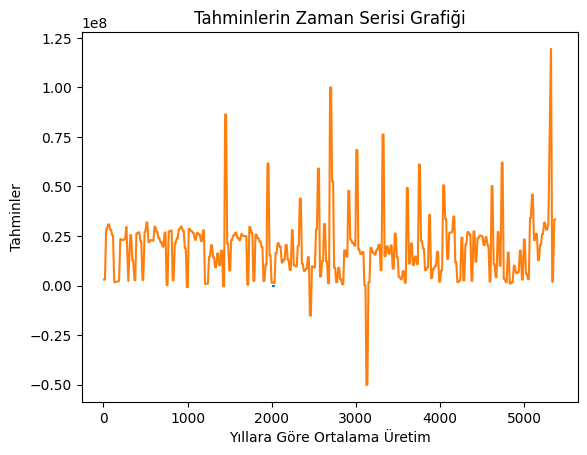

In [ ]:

plt.plot(üret_ort)
plt.plot(tahmin['Tahminler'])

# Grafik özellikleri
plt.xlabel('Yıllara Göre Ortalama Üretim')
plt.ylabel('Tahminler')
plt.title('Tahminlerin Zaman Serisi Grafiği')


Text(0.5, 1.0, 'Tahminlerin Zaman Serisi Grafiği')

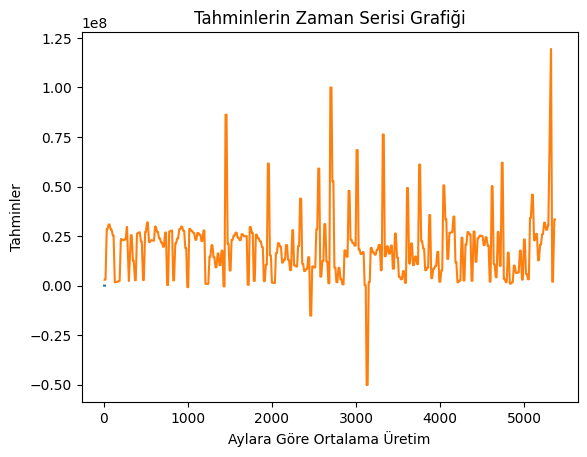

In [ ]:
plt.plot(üret_ort_month)
plt.plot(tahmin['Tahminler'])

# Grafik özellikleri
plt.xlabel('Aylara Göre Ortalama Üretim')
plt.ylabel('Tahminler')
plt.title('Tahminlerin Zaman Serisi Grafiği')

# TAHMİNLER

In [ ]:
tahmin = pd.read_csv('tahminler (2).csv')
tahmin

,Tahminler
0,287.584442
1,287.584442
2,287.584442
3,287.584442
4,287.584442
...,...
5377,333.788879
5378,333.788879
5379,333.788879
5380,333.788879


In [ ]:
# 0 değerlerini NaN değerlerine dönüştürme
tahmin.replace(0, np.nan, inplace=True)

# NaN değerleri içeren satırları kaldırma
tahmin.dropna(inplace=True)


In [ ]:
tahmin.tail()

,Tahminler
5377,333.788879
5378,333.788879
5379,333.788879
5380,333.788879
5381,333.788879


In [ ]:
# Tahminleri CSV dosyasına yazdır
tahmin.to_csv('tahmin_düzeltme.csv', index=False)

In [ ]:
tahmin2 = pd.read_csv('tahmin_düzeltme.csv')
tahmin2

,Tahminler
0,287.584442
1,287.584442
2,287.584442
3,287.584442
4,287.584442
...,...
5377,333.788879
5378,333.788879
5379,333.788879
5380,333.788879


# DERİN ÖĞRENME

Epoch 1/50
320/320 [==============================] - 2s 4ms/step - loss: 291858.1250 - mae: 433.5399 - val_loss: 282128.8438 - val_mae: 422.6427
Epoch 2/50
320/320 [==============================] - 1s 3ms/step - loss: 291583.1875 - mae: 433.2228 - val_loss: 281861.1562 - val_mae: 422.3260
Epoch 3/50
320/320 [==============================] - 1s 3ms/step - loss: 291308.0625 - mae: 432.9048 - val_loss: 281592.7500 - val_mae: 422.0080
Epoch 4/50
320/320 [==============================] - 1s 3ms/step - loss: 291033.6875 - mae: 432.5887 - val_loss: 281325.1875 - val_mae: 421.6910
Epoch 5/50
320/320 [==============================] - 1s 3ms/step - loss: 290759.5312 - mae: 432.2710 - val_loss: 281058.0938 - val_mae: 421.3742
Epoch 6/50
320/320 [==============================] - 2s 5ms/step - loss: 290485.8125 - mae: 431.9550 - val_loss: 280791.0625 - val_mae: 421.0571
Epoch 7/50
320/320 [==============================] - 2s 5ms/step - loss: 290212.2812 - mae: 431.6380 - val_loss: 280524.718

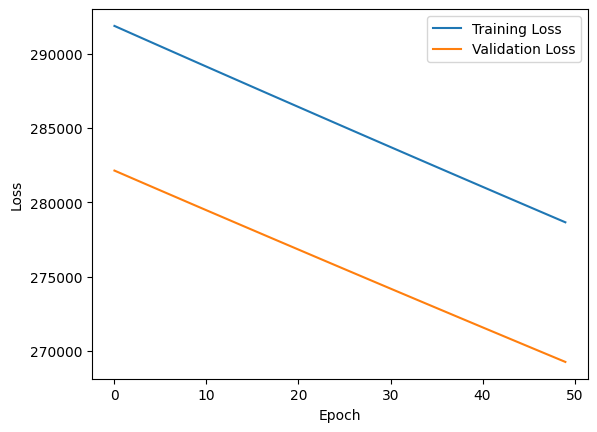

80/80 [==============================] - 0s 2ms/step - loss: 269259.5625 - mae: 407.1334
Test Kaybı (Loss): 269259.5625
Test Ortalama Mutlak Hata (MAE): 407.1334228515625


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Veri setini yükleme
# Örnek olarak CSV dosyasından yükleme işlemi
data = pd.read_excel("GES  Üretim Verileri.xlsx")

# Gerekli veri ön işleme adımlarını yapma
# Örneğin, gereksiz sütunları kaldırma, eksik değerleri doldurma, tarih/saat sütunlarını işleme gibi
# Bu adımlar veri setinize ve gereksinimlerinize bağlı olacaktır.
# 0 değerlerini NaN değerlerine dönüştürme
data.replace(0, np.nan, inplace=True)

# NaN değerleri içeren satırları kaldırma
data.dropna(inplace=True)
# Özelliklerin ve hedef değişkenin ayrılması
X = data.drop(columns=["Üretim Miktarı ( KWh )"])
y = data["Üretim Miktarı ( KWh )"]

X = data.drop(columns=["Üretim Miktarı ( KWh )", "Tarih ve Saat"])

# Verilerin ölçeklendirilmesi
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model oluşturma
model2 = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[1])),
    Dense(1)
])

# Modeli derleme
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Modeli eğitme
history = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Eğitim sürecinin grafikleştirilmesi (isteğe bağlı)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Modelin değerlendirilmesi
loss, mae = model2.evaluate(X_test, y_test)
print("Test Kaybı (Loss):", loss)
print("Test Ortalama Mutlak Hata (MAE):", mae)


In [ ]:
# Tahmin yapma
predictions2 = model2.predict(X)
predictions2 = scaler.inverse_transform(predictions2)

399/399 [==============================] - 1s 2ms/step


In [ ]:
# # Tahminleri CSV dosyasına yazdır
# predictions_df.to_csv('tahminler.csv', index=False)
# Tüm DataFrame'i istediğiniz formatta string'e çevir
predictions_df_2 = predictions_df_2.applymap(lambda x: '%.6f' % x if isinstance(x, float) else x)

# Tahminleri CSV dosyasına yazdır
predictions_df_2.to_csv('tahminler_deep.csv', index=False)

NameError: name 'predictions_df_2' is not defined

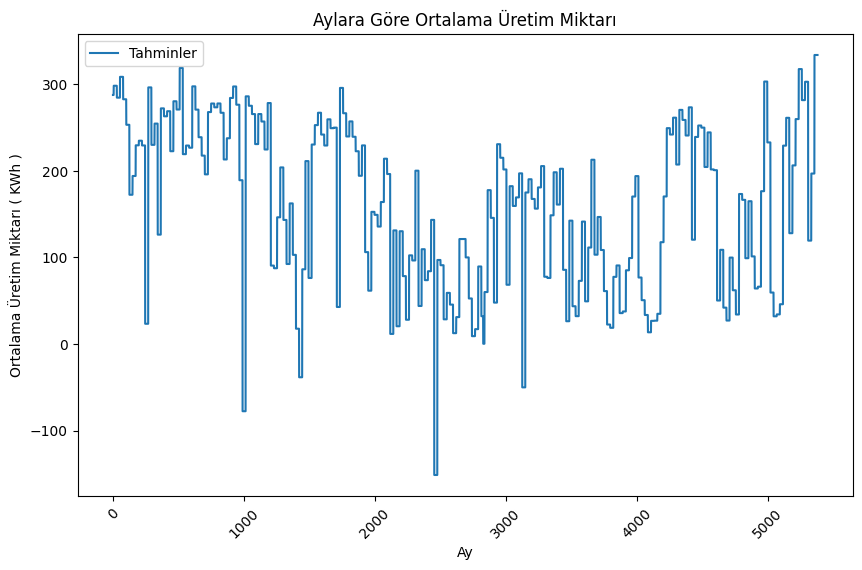

In [ ]:
# üret_ort_month = data.groupby('day')['Üretim Miktarı ( KWh )'].mean()

tahmin.plot(kind='line', figsize=(10, 6), xlabel='Ay', ylabel='Ortalama Üretim Miktarı ( KWh )', title='Aylara Göre Ortalama Üretim Miktarı')
plt.xticks(rotation=45)  # x eksenindeki ay etiketlerini 45 derece döndürme
plt.show()